# Data Exploration

The purpose of this notebook is to explore the dataset collected and evaluate it regarding it's use for urban bikeway obstacle detection. The main points are:

1. Data Collected from Video Streaming
2. Evaluate Quality of Depth Map
3. Notable Properties for Data Preparation

In [19]:
from PIL import Image
from pillow_heif import register_heif_opener
import os
import random
import matplotlib.pyplot as plt

# Data Collected from Video Streaming

The dataset was collected through video streaming while biking on urban bikeways using an iPhone mounted on the handlebar at a -30 degree angle facing the ground. Images were taken during mid-day in Berlin, potentially affecting lighting and overall image quality. The dataset consists of two image formats, HEIC and PNG, with raw HEIC files using the same settings as Portrait Mode, and converted depth floating points into grayscale PNG preprocessed from an app. However, it is worth noting that the dataset may not represent a comprehensive sample of urban bikeways.

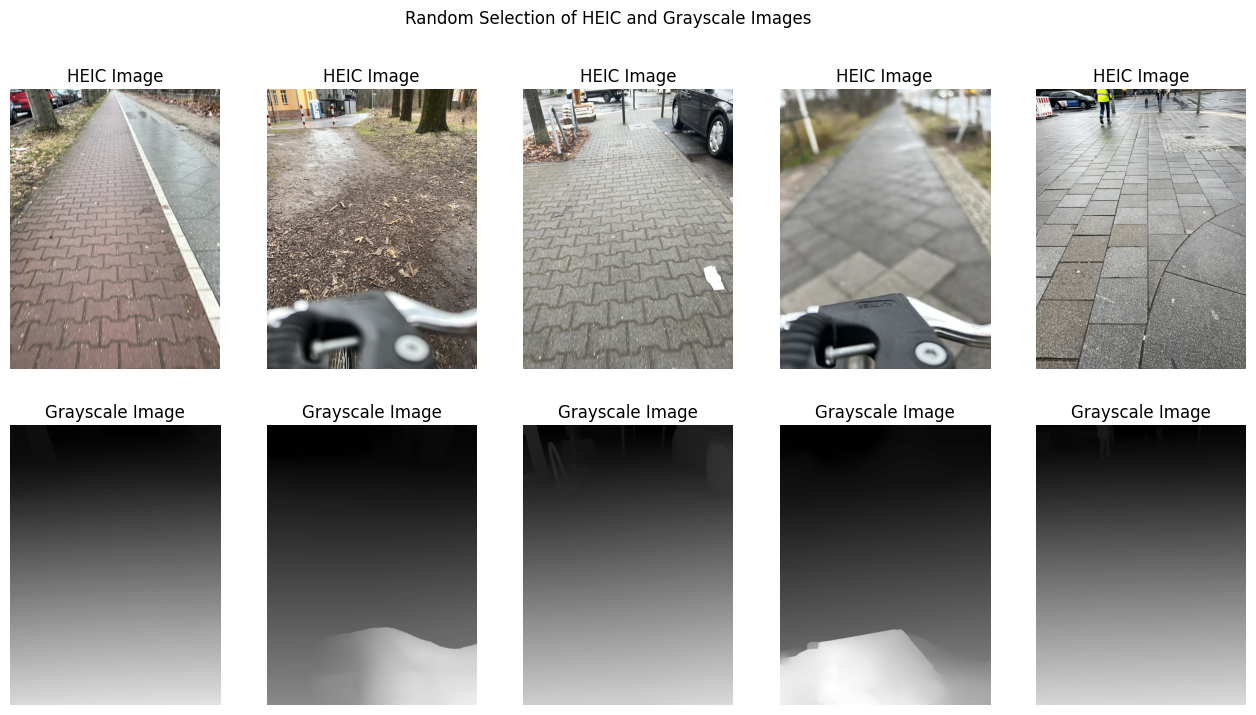

In [20]:
heic_dir = 'data/train-heic'
depth_dir = 'data/train-depth'

heic_files = [f for f in os.listdir(heic_dir) if f.endswith(('.heic', '.HEIC'))]
random_heic_files = random.sample(heic_files, 5)

fig, axs = plt.subplots(2, 5, figsize=(16, 8))

for i, random_heic_file in enumerate(random_heic_files):
    basename = os.path.splitext(random_heic_file)[0]
    heic_path = os.path.join(heic_dir, random_heic_file)
    depth_path = os.path.join(depth_dir, basename + '.png')

    if os.path.exists(depth_path):
        register_heif_opener()
        heic_image = Image.open(heic_path)
        depth_image = Image.open(depth_path).convert('L')
        axs[0, i].imshow(heic_image)
        axs[0, i].set_title('HEIC Image')
        axs[0, i].axis('off')
        axs[1, i].imshow(depth_image, cmap='gray')
        axs[1, i].set_title('Grayscale Image')
        axs[1, i].axis('off')

fig.suptitle('Random Selection of HEIC and Grayscale Images')
plt.show()

## Image Attributes

| Format | HEIC | PNG (Grayscale) |
| - | - | - |
| Description |Colored image of the road, captured by the iPhone's camera. | Contains depth information of the road, represented by shades of gray, with white representing closer objects and black representing further objects |
| Dimension | 3024 × 4032 | 576 × 768 |
| Resolution | 72 × 72 | 72 × 72 |
| Color Space | RGB | Grayscale |
| Bit Depth | 24-bit | 8-bit |
| Compression | HEIC images are compressed using the HEVC (High Efficiency Video Coding) codec, which provides better compression efficiency than JPEG. | PNG images are compressed using lossless compression. |
| Metadata | HEIC images contain metadata such as datetime, camera settings, and location. | PNG images do not contain metadata. |

# Quality of Depth Maps

The iPhone 13 Pro's depth map provides grayscale PNG images that contain depth information, with white pixels indicating closer objects and black pixels indicating further objects. Although the depth maps generated by the iPhone 13 Pro are not as accurate as those obtained using a LiDAR scanner, they still provide useful information for applications such as augmented reality and portrait mode photography. One limitation of the depth maps is that they may not be as accurate in low-light conditions or with complex scenes, as they rely on a combination of stereo and monocular depth sensing technologies.

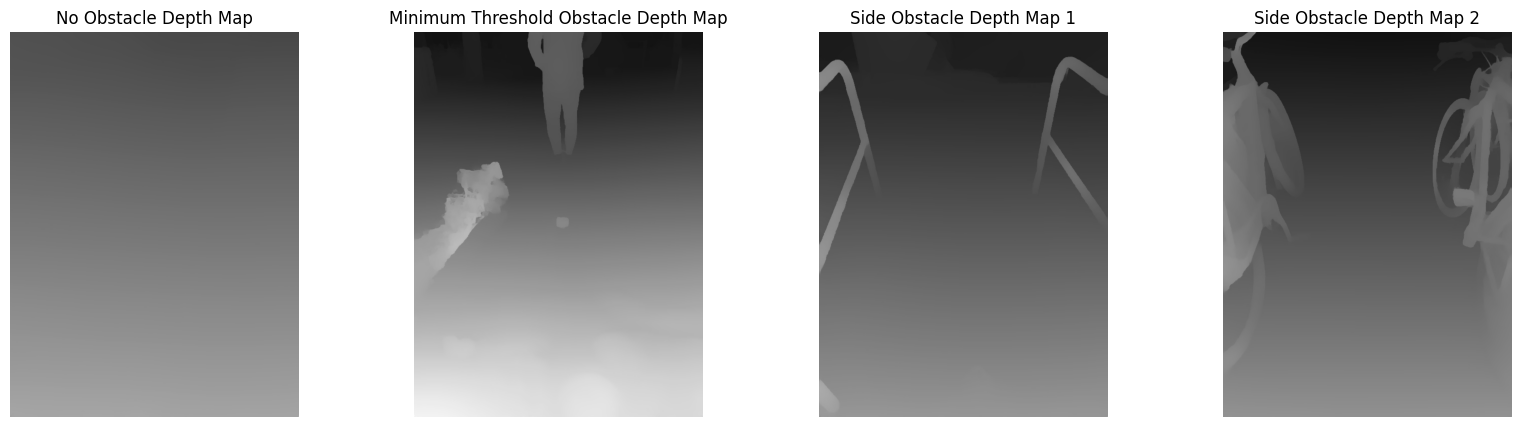

In [22]:
image1 = Image.open("data/test-png/no_obstacle_depth.png")
image2 = Image.open("data/test-png/ground_truth_depth.png")
image3 = Image.open("data/test-png/side_obstacle1_depth.png")
image4 = Image.open("data/test-png/side_obstacle2_depth.png")

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(image1, cmap='gray')
ax[0].set_title('No Obstacle Depth Map')
ax[1].imshow(image2, cmap='gray')
ax[1].set_title('Minimum Threshold Obstacle Depth Map')
ax[2].imshow(image3, cmap='gray')
ax[2].set_title('Side Obstacle Depth Map 1')
ax[3].imshow(image4, cmap='gray')
ax[3].set_title('Side Obstacle Depth Map 2')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
plt.show()

## Notable Properties for Data Preparation

1. **Data Augmentation**: Combining color and depth information in a single RGBD image can improve model accuracy and robustness.
3. **Depth Image Labeling**: Labeled data is necessary for supervised machine learning, and labeling depth images may involve segmenting objects or regions of interest from the background.
2. **Data Processing**: Depth images may contain extraneous information, so it's important to carefully select and preprocess images to ensure they contain only relevant data.

